# ### Predictive model using Linear Regression 

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [123]:
Dataset = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')
Dataset.head(10) # afficher le Dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [124]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**All my variables are numerical so no need to encode**

In [125]:
Dataset["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<Axes: xlabel='MEDV'>

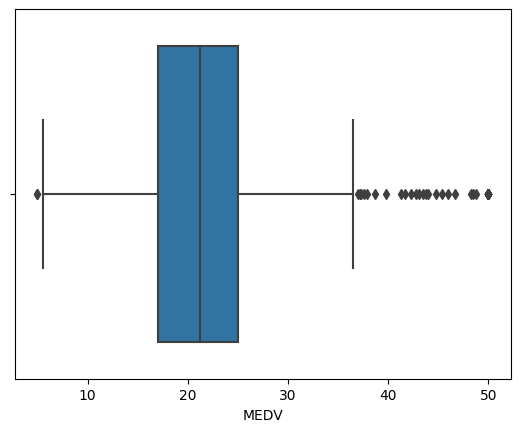

In [126]:
sns.boxplot(x=Dataset['MEDV'])

In [127]:
hous_num = Dataset.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = hous_num.corr()['MEDV'][:-1] # -1 means that the latest row is MEDV
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with MEDV:\n{}".format(len(top_features), top_features))

There is 3 strongly correlated values with MEDV:
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


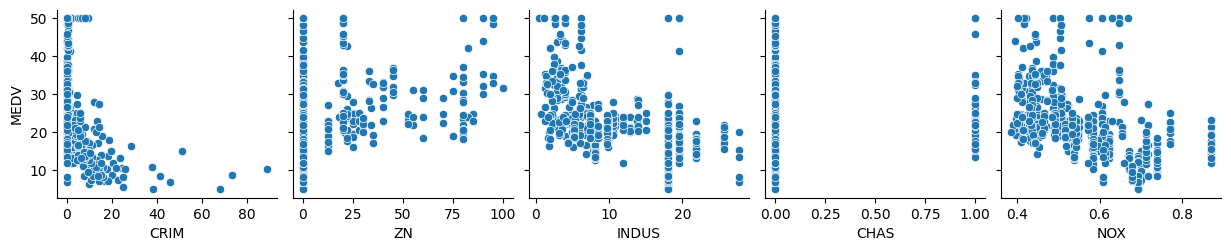

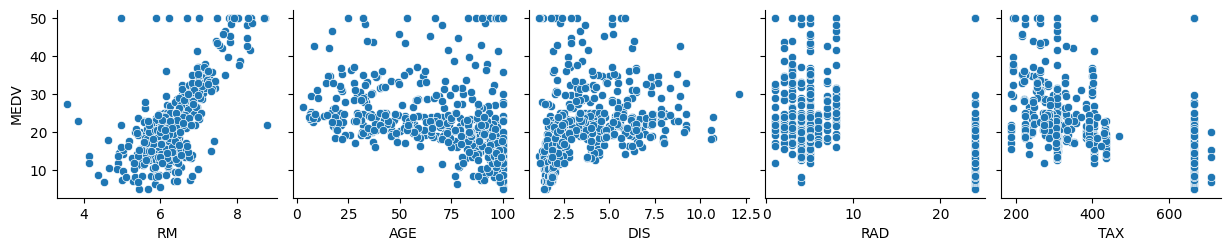

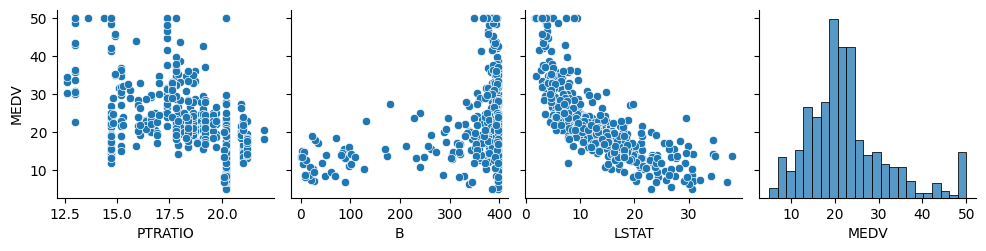

In [128]:
for i in range(0, len(hous_num.columns), 5):
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5],
                y_vars=['MEDV'])

In [129]:
new_data = Dataset.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]
features = new_data.corr()['MEDV'].sort_values()
features

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

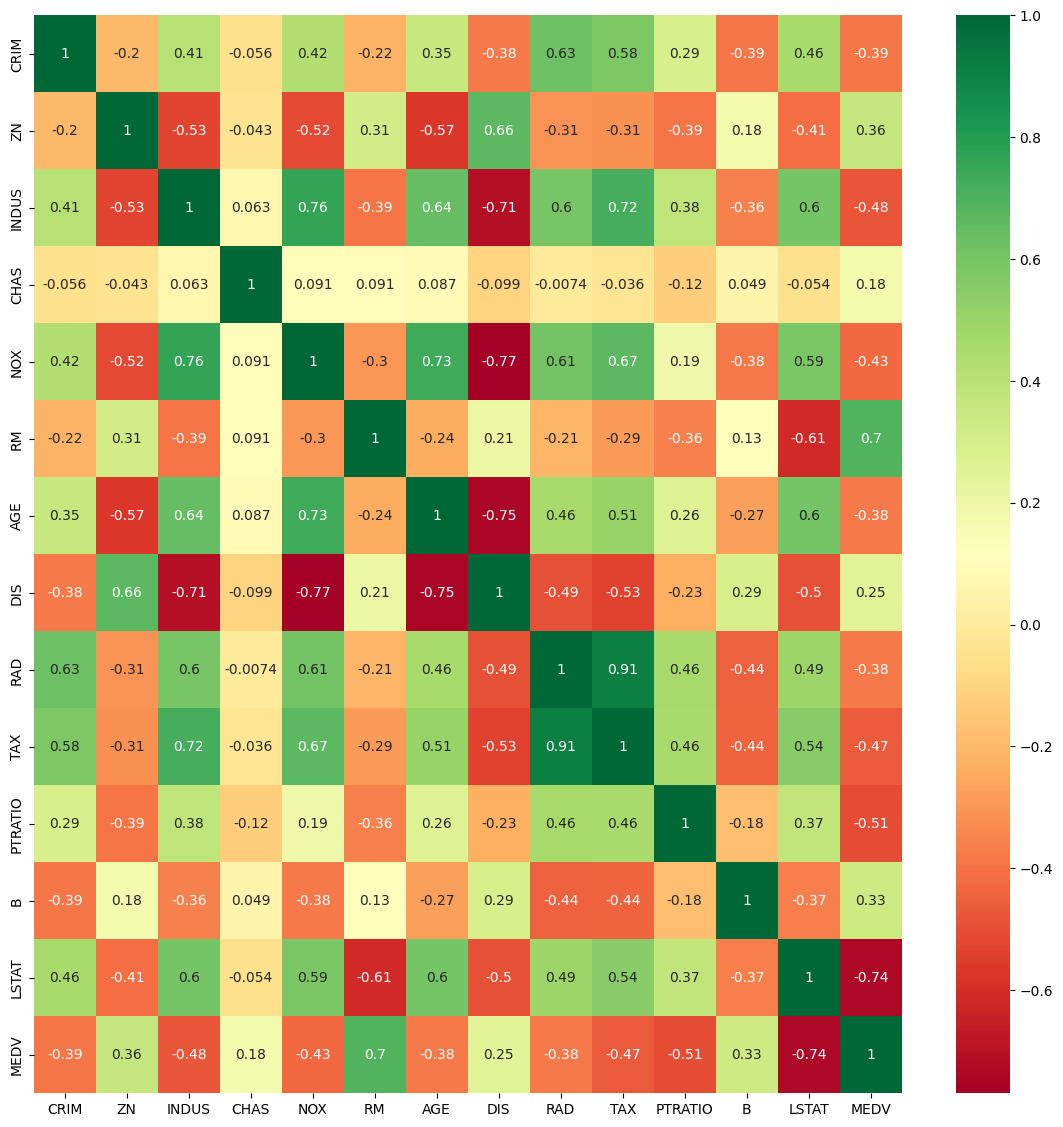

In [130]:
plt.figure(figsize=(14,14))
sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

*** Correlation matrix that shows out correlation between features and target ***

<Axes: >

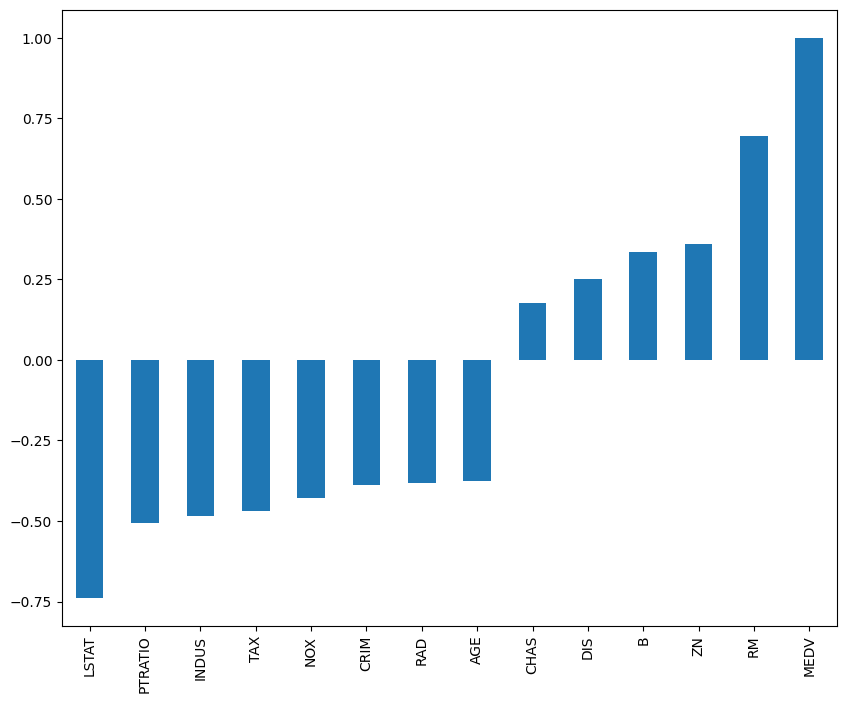

In [131]:
features.plot(kind='bar',figsize=(10,8))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


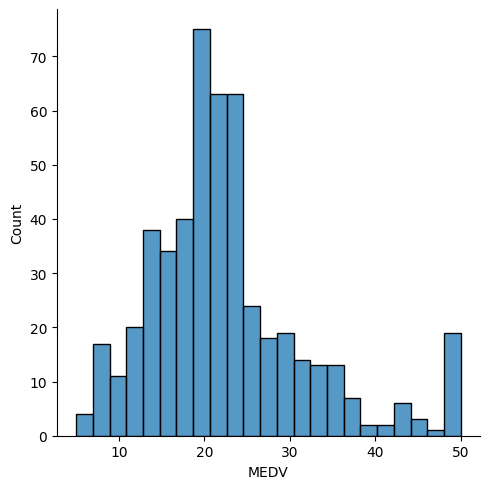

In [132]:
sp_untransformed = sns.displot(Dataset['MEDV'])

**My target feature is skewed on the right side**

#### Using a Statistical Test
* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [133]:
from scipy.stats.mstats import normaltest 
normaltest(Dataset.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

In [134]:
print("Skewness: %f" % Dataset['MEDV'].skew())

Skewness: 1.108098


**Transformations to make target variable more normally distributed for Regression**


**The log transformation can transform data that is significantly skewed right to be more normally distributed:**

In [135]:
log_transformed = np.log(Dataset['MEDV'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


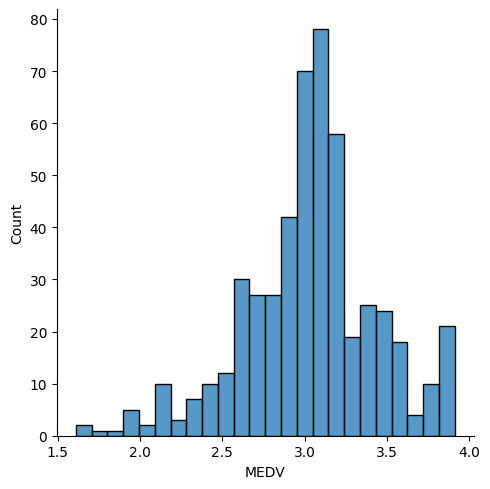

In [136]:
sp_transformed = sns.displot(log_transformed)

In [137]:
normaltest(log_transformed)


NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

In [138]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.330321


Conclusion: The output is closer to normal distribution, but still not completely normal.

### Square root Transformation

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

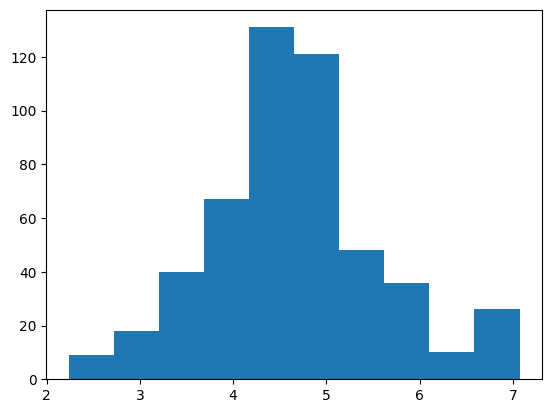

In [139]:
sqrt_medv = np.sqrt(Dataset.MEDV)
plt.hist(sqrt_medv)

In [140]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

In [141]:
print("Skewness: %f" % (sqrt_medv).skew())

Skewness: 0.438935


### Box cox Transformation
The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [142]:
from scipy.stats import boxcox
bc_result = boxcox(Dataset.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]
lam

0.21662090066621686

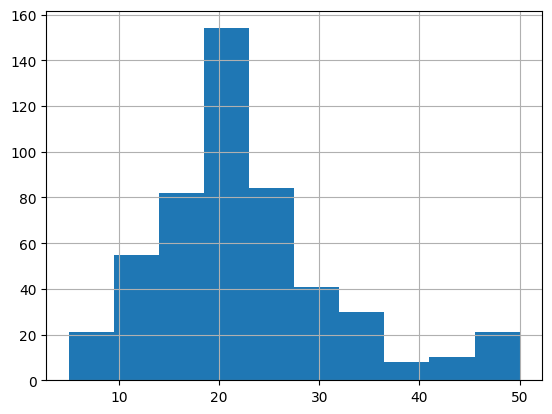

In [143]:
Dataset['MEDV'].hist();

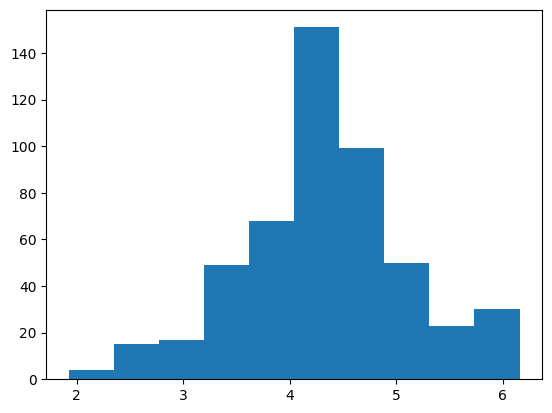

In [144]:
plt.hist(boxcox_medv);

In [145]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528777459214, pvalue=0.10468866918093613)

In [146]:
#print("Skewness: %f" % (boxcox_medv).skew())

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

Now that we have a normally distributed y-variable, let's test Regression using this transformed target variables.


## **Handling the Duplicates**
Having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas duplicated() function and search by the 'PID' column, which contains a unique index number for each entry.

In [147]:
Dataset.index.is_unique

True

Text(0.5, 1.0, 'Total Missing Values')

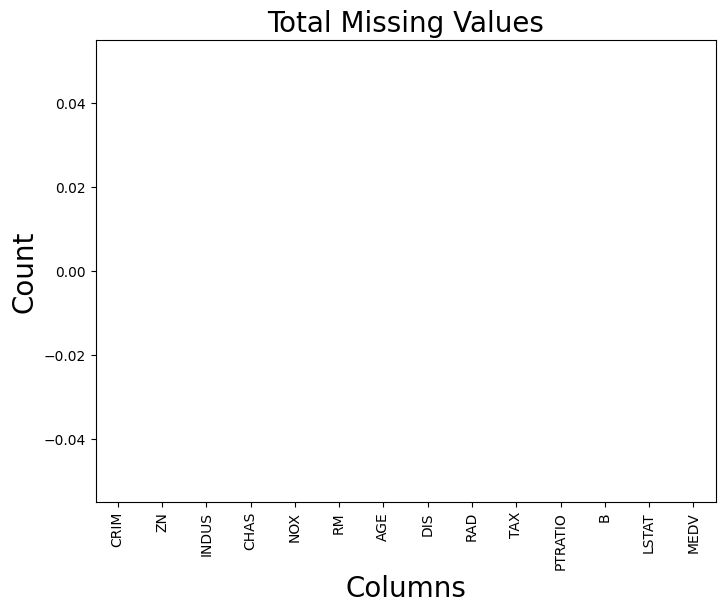

In [148]:
total = Dataset.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

As we can see, there is not duplicate row in this dataset.

### Testing regression:


In [149]:
lr = LinearRegression()

**Define and load the predictor (X) and Target(y) variables**


In [150]:
y_col = "MEDV"

X = Dataset.drop(y_col, axis=1)
y = Dataset[y_col]


**Create Polynomial Features**


In [151]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Split the data into Training and Test Sets** 

The split ratio here is 0.7 and 0.3 which means we will assign 70% data for training and 30% data for testing

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**


In [153]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

*** Then we will get our distribution as close to a normal distribution as possible".***

In [154]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

***Training and Prédiction***

In [155]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

#### Apply inverse transformations to be able to use these in a Regression context
Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [156]:
from scipy.special import inv_boxcox
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [157]:
Dataset['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!

## The R^2 of the LinearRegression

In [158]:
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

0.8886829590861571

In [159]:
mean_squared_error(y_test,y_pred_tran)

10.403511025590763

In [160]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred_tran))
print("Le RMSE fait "+str(RMSE))

Le RMSE fait 3.225447414792367


### The R^2 of a LinearRegression without the box cox transformation.

In [161]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

0.8687609133106042

In [162]:
mean_squared_error(y_test,lr_pred)

12.265393278090658

In [163]:
RMSE=np.sqrt(mean_squared_error(y_test,lr_pred))
print("Le RMSE fait "+str(RMSE))

Le RMSE fait 3.5021983493358366


**It's the end of this project.Our predictive model using linear regression to
predict a numerical outcome based on 13
features got great insight through boxcox transformation . Use a dataset with a continuous target
variable.**

****